In [1]:
import sys
sys.path.insert(1, '../')

from pckgs.import_pckg import *
from pckgs.units import *
# importing FIRAS data
from FIRAS import *

# importing generic constants and functions
from const_func_general import *
# importing distortion specific constants and functions
from cons_func_distortion import *


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from pckgs.plot_params import params
import matplotlib
matplotlib.rcParams.update(params)
#plt.rcParams['font.family'] = 'DeJavu Serif'
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Normalization Condition

$$ \frac{4 \pi}{c} \int G_\mathrm{in} (\nu, \nu', z') d\nu = \frac{h \nu'}{k T_\gamma(z')} \alpha_\rho \rho_\gamma(0) = \frac{h \nu'}{1+z'} N_\gamma(0) $$

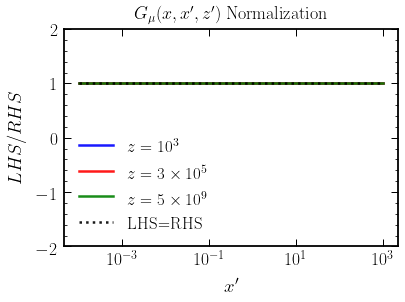

In [2]:
# this is a test to check normalization of G_mu
# below we will plot ratio of the left and the right hand sides to confirm their equality 
x_ary_int    = np.logspace(-5,2.2, 1000)

x_prime_test = np.logspace(-4,3,1000)

z_prime_test_1 = 1e3
z_prime_test_2 = 3*1e5
z_prime_test_3 = 5*1e9

LHS_test_1 = (4*np.pi/c) * np.trapz( np.transpose( greens_mu_MT(x_ary_int,x_prime_test, z_prime_test_1, TCMB_0, units='eV_per_cmSq') ), x_ary_int) * (TCMB_0 / h)
LHS_test_2 = (4*np.pi/c) * np.trapz( np.transpose( greens_mu_MT(x_ary_int,x_prime_test, z_prime_test_2, TCMB_0, units='eV_per_cmSq') ), x_ary_int) * (TCMB_0 / h)
LHS_test_3 = (4*np.pi/c) * np.trapz( np.transpose( greens_mu_MT(x_ary_int,x_prime_test, z_prime_test_3, TCMB_0, units='eV_per_cmSq') ), x_ary_int) * (TCMB_0 / h)

RHS_test = x_prime_test * alpha_rho * rho_gamma(TCMB_0) / cmInv_to_eV**3

plt.figure()

plt.xscale('log')


plt.plot(x_prime_test,  LHS_test_1/RHS_test, label = r'$z=10^3$', color = 'blue')
plt.plot(x_prime_test,  LHS_test_2/RHS_test, label = r'$z=3 \times 10^5$', color = 'red')
plt.plot(x_prime_test,  LHS_test_3/RHS_test, label = r'$z=5 \times 10^9$', color = 'green')

plt.plot(x_prime_test, [1 for x_p in x_prime_test], label = r'LHS=RHS', color = 'black',linestyle='dotted')

plt.title(r'$G_\mu(x,x^\prime,z^\prime)$ Normalization')

plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$LHS/RHS$')

plt.ylim(-2, 2)

plt.legend()

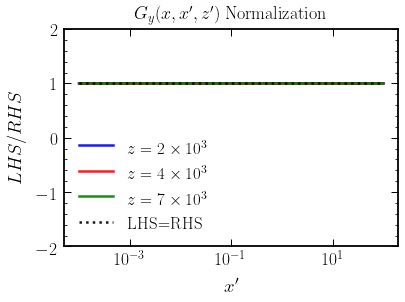

In [18]:
# this is a test to check normalization of G_y
# below we will plot ratio of the left and the right hand sides to confirm their equality 
x_ary_int    = np.logspace(-5,2.2, 1000)

x_prime_test = np.logspace(-4,2,1000)

z_prime_test_1 = 2e3
z_prime_test_2 = 4*1e3
z_prime_test_3 = 7*1e3

LHS_test_1 = (4*np.pi/c) * np.trapz( np.transpose( greens_y(x_ary_int,x_prime_test, z_prime_test_1, TCMB_0, units='eV_per_cmSq') ), x_ary_int) * (TCMB_0 / h)
LHS_test_2 = (4*np.pi/c) * np.trapz( np.transpose( greens_y(x_ary_int,x_prime_test, z_prime_test_2, TCMB_0, units='eV_per_cmSq') ), x_ary_int) * (TCMB_0 / h)
LHS_test_3 = (4*np.pi/c) * np.trapz( np.transpose( greens_y(x_ary_int,x_prime_test, z_prime_test_3, TCMB_0, units='eV_per_cmSq') ), x_ary_int) * (TCMB_0 / h)

RHS_test = x_prime_test * alpha_rho * rho_gamma(TCMB_0) / cmInv_to_eV**3

plt.figure()

plt.xscale('log')


plt.plot(x_prime_test,  LHS_test_1/RHS_test, label = r'$z=2 \times 10^3$', color = 'blue')
plt.plot(x_prime_test,  LHS_test_2/RHS_test, label = r'$z=4 \times 10^3$', color = 'red')
plt.plot(x_prime_test,  LHS_test_3/RHS_test, label = r'$z=7 \times 10^3$', color = 'green')

plt.plot(x_prime_test, [1 for x_p in x_prime_test], label = r'LHS=RHS', color = 'black',linestyle='dotted')

plt.title(r'$G_y(x,x^\prime,z^\prime)$ Normalization')

plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$LHS/RHS$')

plt.ylim(-2, 2)

plt.legend()